In [13]:
import requests
import pandas as pd
from api_keys import IEX_api

In [14]:
ticker = 'MSFT'
period = 'annual'
last = '30'

In [15]:
#fundamentals
strategy = 'fundamentals'
url = f'https://api.iex.cloud/v1/data/core/{strategy}/{ticker}/{period}?last={last}&token={IEX_api}'
response = requests.get(url)
fundamentals = response.json()
response

<Response [200]>

In [16]:
fundamentals[0].keys()

dict_keys(['accountsPayable', 'accountsPayableTurnover', 'accountsReceivable', 'accountsReceivableTurnover', 'asOfDate', 'assetsCurrentCash', 'assetsCurrentCashRestricted', 'assetsCurrentDeferredCompensation', 'assetsCurrentDeferredTax', 'assetsCurrentDiscontinuedOperations', 'assetsCurrentInvestments', 'assetsCurrentLeasesOperating', 'assetsCurrentLoansNet', 'assetsCurrentOther', 'assetsCurrentSeparateAccounts', 'assetsCurrentUnadjusted', 'assetsFixed', 'assetsFixedDeferredCompensation', 'assetsFixedDeferredTax', 'assetsFixedDiscontinuedOperations', 'assetsFixedLeasesOperating', 'assetsFixedOperatingDiscontinuedOperations', 'assetsFixedOperatingSubsidiaryUnconsolidated', 'assetsFixedOreo', 'assetsFixedOther', 'assetsFixedUnconsolidated', 'assetsUnadjusted', 'capex', 'capexAcquisition', 'capexMaintenance', 'cashConversionCycle', 'cashFlowFinancing', 'cashFlowInvesting', 'cashFlowOperating', 'cashFlowShareRepurchase', 'cashLongTerm', 'cashOperating', 'cashPaidForIncomeTaxes', 'cashPaidF

In [17]:
fundamentals[0]['pricePerEarnings']

35.1641751772364

In [18]:
P_E = pd.DataFrame({
    'date':'',
    'ticker': ticker,
    'P/E': ''
}, index = range(len(fundamentals)))
for i in range(len(fundamentals)):
    P_E.iloc[i]['date'] = fundamentals[i]['date']
    P_E.loc[i, 'P/E'] = fundamentals[i]['pricePerEarnings']

P_E['date'] = pd.to_datetime(P_E['date'], unit = 'ms').dt.year
P_E.set_index('date')

,ticker,P/E
date,,
2023,MSFT,35.164175
2022,MSFT,26.622923
2021,MSFT,33.637564
2020,MSFT,35.310118
2019,MSFT,26.467683
2018,MSFT,46.380203
2017,MSFT,25.460279
2016,MSFT,24.409168
2015,MSFT,29.887157


<Axes: xlabel='date'>

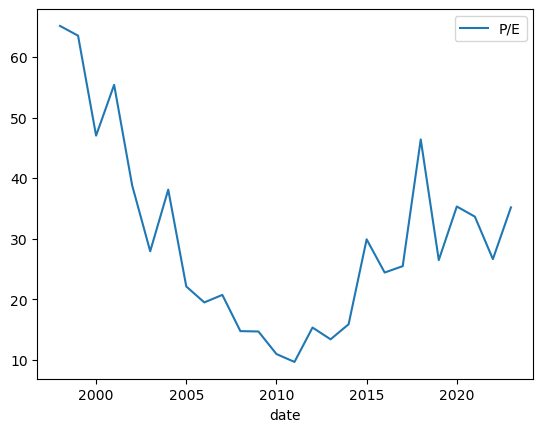

In [19]:
P_E.plot(x = 'date', y = 'P/E')